In [8]:
import os
import shutil
import random

# Directories

In [9]:
# level1InputDir = './randomTest'

boxDetectWeight = './1. Image to Plate Model/box-detect-weight-s.pt'
textDetectWeight = './2. Plate to Number Model/text-detect-weight-s-best.pt'

outputDir = './output/'
level1InputDir = './test'
output1Dir = './output/box'
level2InputDir = './output/box/exp/crops/LP'
output2Dir = './output/text'
level3InputDir = './output/text/exp'

# Clone YOLO-v5

In [10]:
! git clone https://github.com/ultralytics/yolov5.git && pip install -r yolov5/requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.


# Detect License Plate

In [11]:
!rmdir /S /Q "./{outputDir}"
!python yolov5/detect.py --source "{level1InputDir}" --project "{output1Dir}" --weights "{boxDetectWeight}" --img 416 --save-txt --save-conf --save-crop

detect: weights=['./1. Image to Plate Model/box-detect-weight-s.pt'], source=./test, data=yolov5\data\coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=./output/box, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-114-g3c0a6e6 Python-3.8.1 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 F:\BUET\4-2\CSE472_(Machine_Learning_Sessional)\5._Project\License-Plate-Recognition\test\Vehicle00.jpg: 416x416 1 LP, 390.0ms
image 2/10 F:\BUET\4-2\CSE472_(Machine_Learning_Sessional)\5._Project\License-Plate-Recognition\test\Vehicle03.jpg: 416x320 1 LP, 437.8ms
image 3/10 F:\BUET\4-2\CSE472_(Machine_Learning_Sessional)\5._Project\License-Plate-Reco

# Detect Text

In [12]:
!python yolov5/detect.py --source "{level2InputDir}" --project "{output2Dir}" --weights "{textDetectWeight}" --img 416 --save-txt --save-conf --line-thickness 1 --hide-conf

detect: weights=['./2. Plate to Number Model/text-detect-weight-s-best.pt'], source=./output/box/exp/crops/LP, data=yolov5\data\coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=./output/text, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-114-g3c0a6e6 Python-3.8.1 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7285219 parameters, 0 gradients, 16.6 GFLOPs
image 1/10 F:\BUET\4-2\CSE472_(Machine_Learning_Sessional)\5._Project\License-Plate-Recognition\output\box\exp\crops\LP\Vehicle00.jpg: 320x416 1 2, 2 3s, 1 6, 1 7, 1 8, 1 Metro, 1 Ga, 1 Dhaka, 168.5ms
image 2/10 F:\BUET\4-2\CSE472_(Machine_Learning_Sessional)\5._Project\License-Plate-Recognition\output\box\exp\crops\LP\Vehicle03.jpg: 3

# Ready output file

In [13]:
classes = []
with open('./classes-BN.txt', 'r', encoding='utf8') as f:
    x = f.readline()
    while x:
        x = x.rstrip('\n')
        classes.append(x)
        x = f.readline()

outputs = []
def mySort(ara):
    ara = sorted(ara, key=lambda box:box[1])
    ans = []
    for v in ara:
        if v[0]>9 :
            ans.append(v)
    for v in ara:
        if v[0]<=9 :
            ans.append(v)
    return ans

for filename in os.listdir(level3InputDir+'/labels'):
    labels = []
    filepath = level3InputDir+"/labels/"+filename
    with open(filepath, 'r') as l:
        x = l.readline()
        while x:
            position = []
            position.append(int(x.split(' ')[0]))
            position.append(float(x.split(' ')[1]))
            position.append(float(x.split(' ')[2]))
            position.append(float(x.split(' ')[3]))
            position.append(float(x.split(' ')[4]))
            labels.append(position)
            x = l.readline()
        labels = mySort(labels)
        outputs.append([labels, filename])
labels = []
with open('output/label.txt','w',encoding='utf8') as f:
    for output in outputs:
        s = output[1]+" => "
        for c in output[0]:
            s += classes[c[0]]+" "
        s += '\n'
        f.write(s)
        labels.append(s)

# Show Image

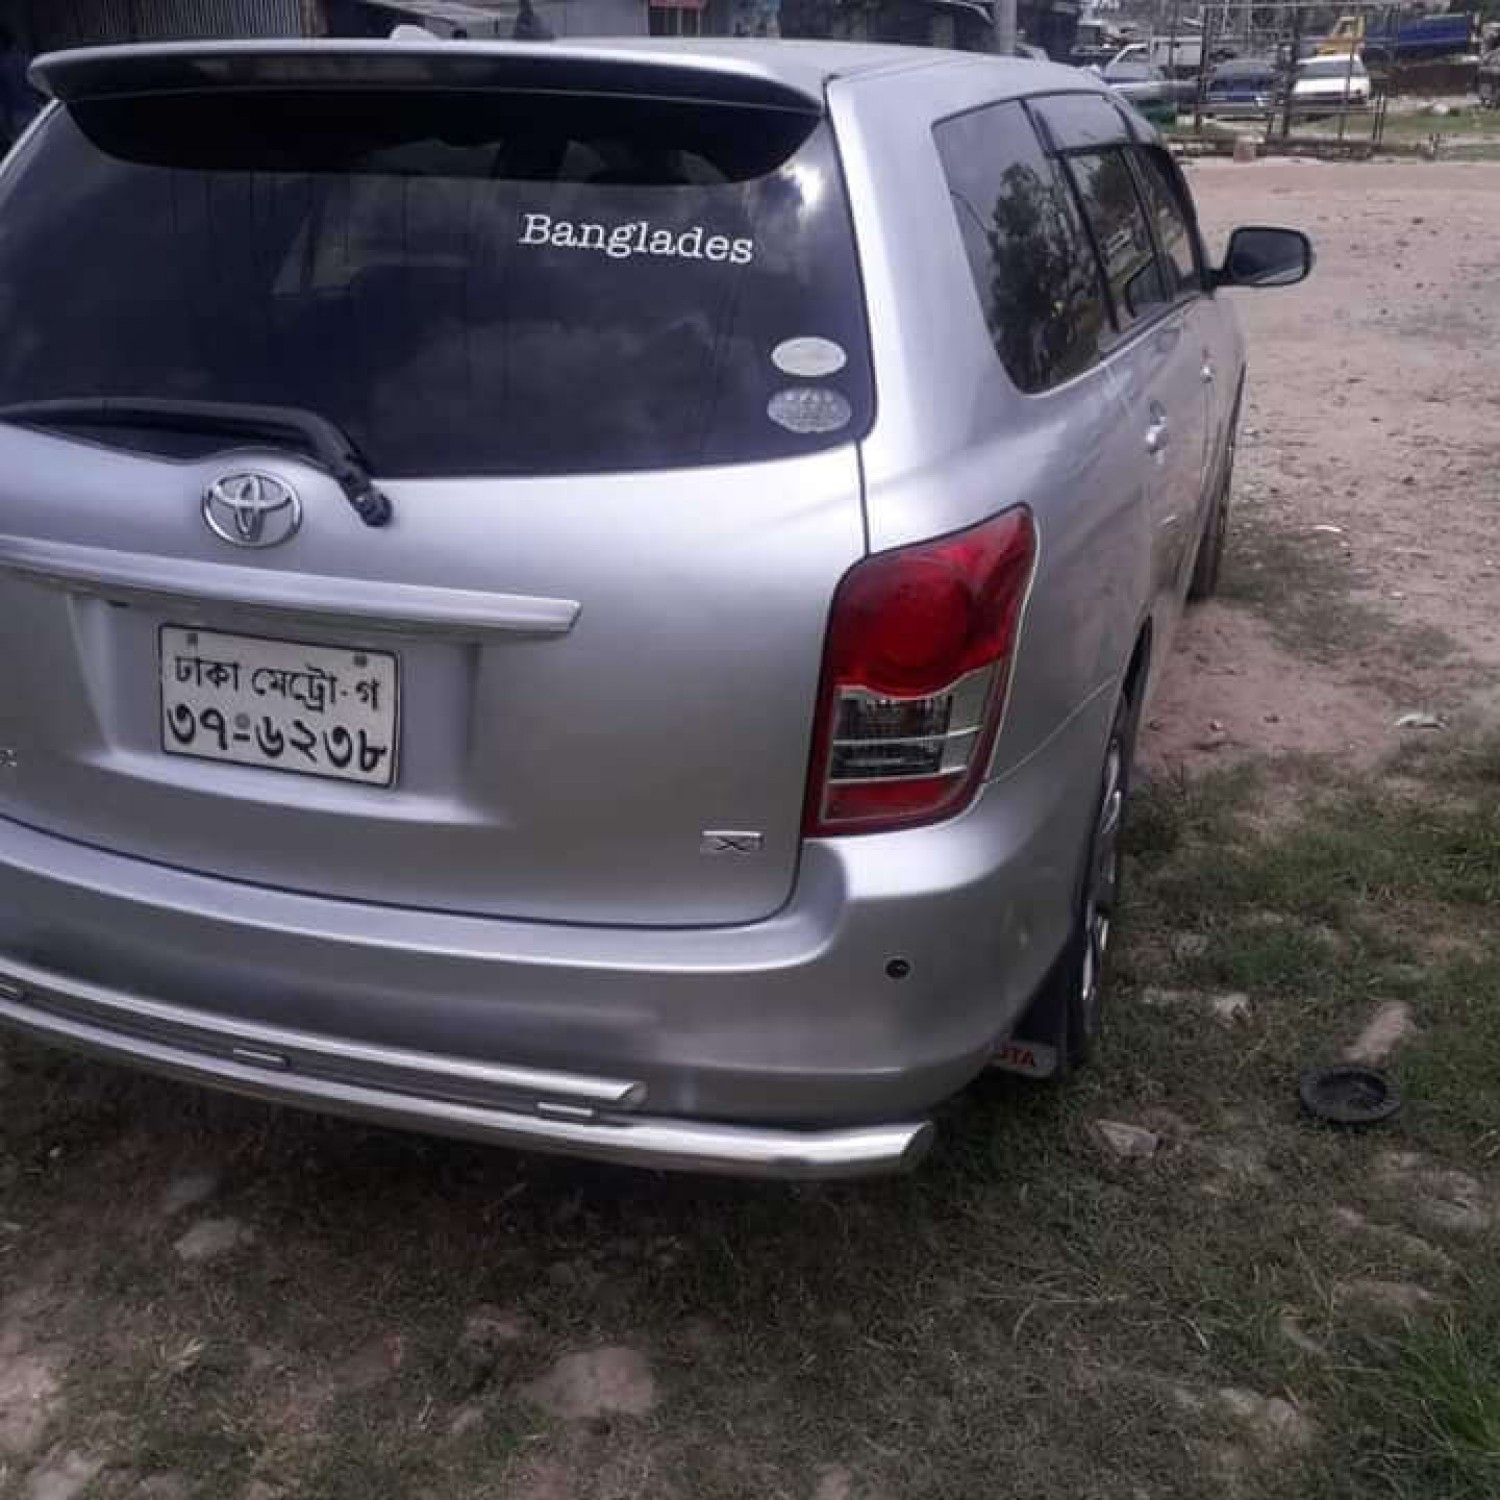

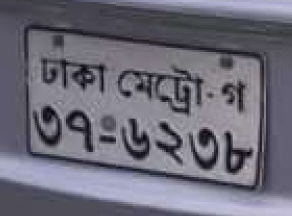

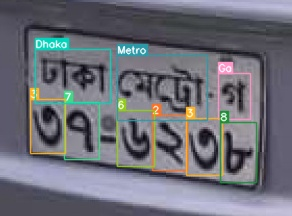

Vehicle00.txt => ঢাকা মেট্রো গ ৩ ৭ ৬ ২ ৩ ৮ 



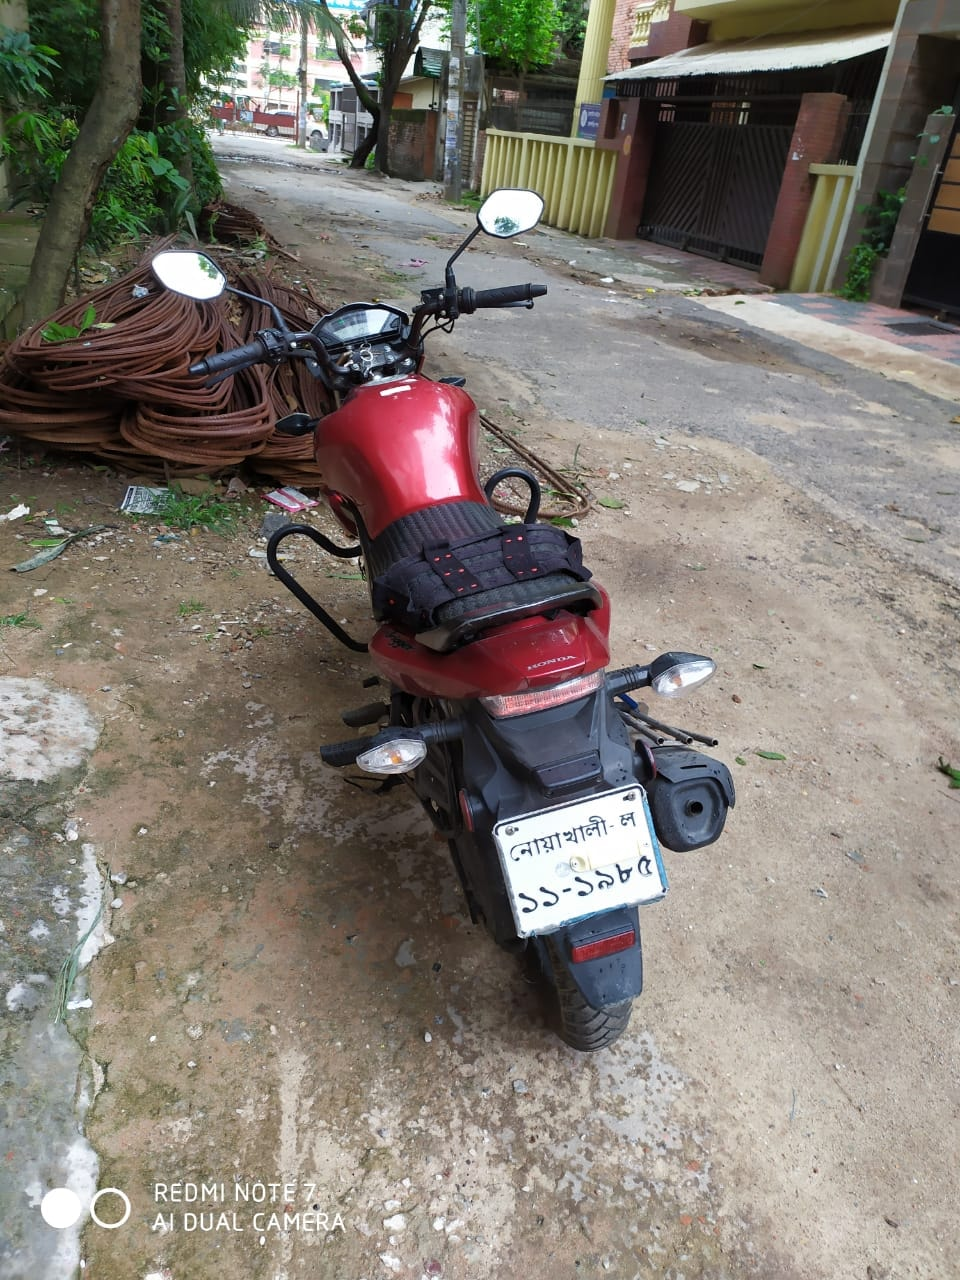

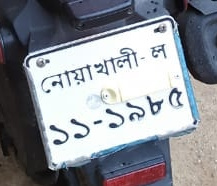

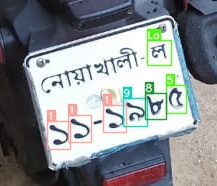

Vehicle03.txt => ল ১ ১ ১ ৯ ৮ ৫ 



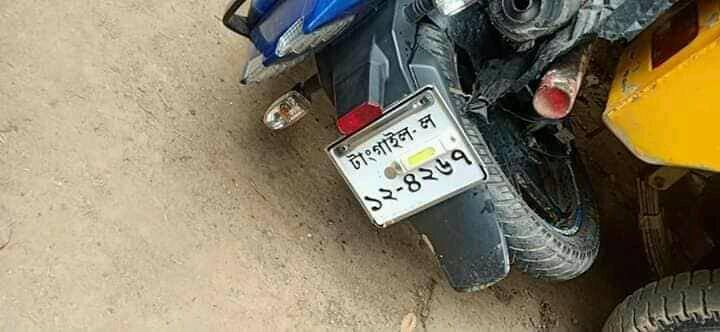

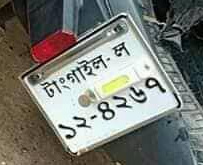

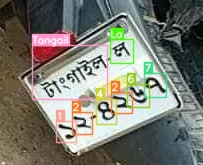

Vehicle04.txt => টাঙ্গাইল ল ১ ২ ৪ ২ ৬ ৭ 



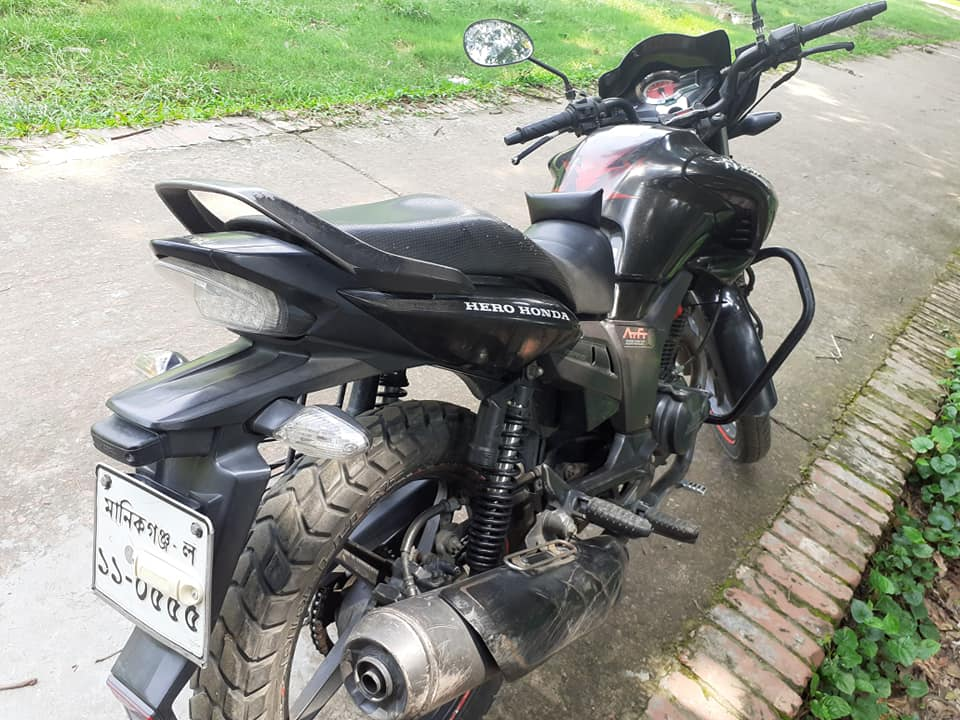

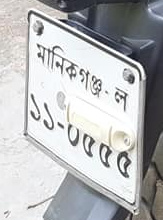

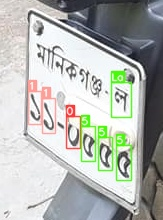

Vehicle06.txt => ল ১ ১ ০ ৫ ৫ ৫ 



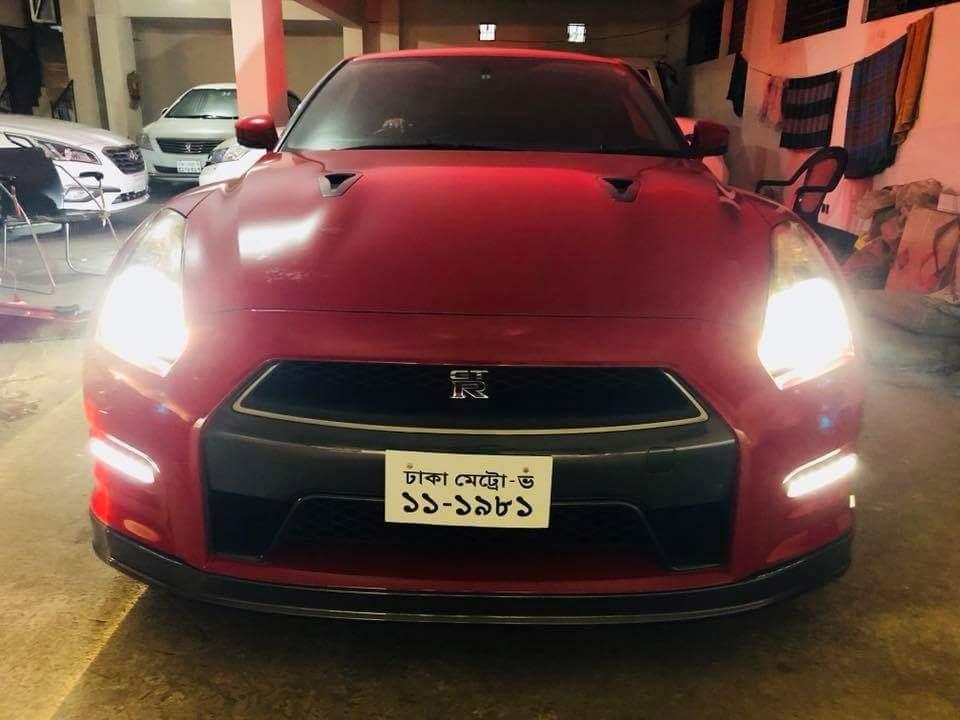

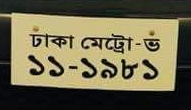

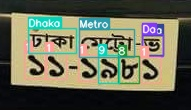

Vehicle08.txt => ঢাকা মেট্রো ভ ড ১ ১ ১ ৯ ৮ ১ 



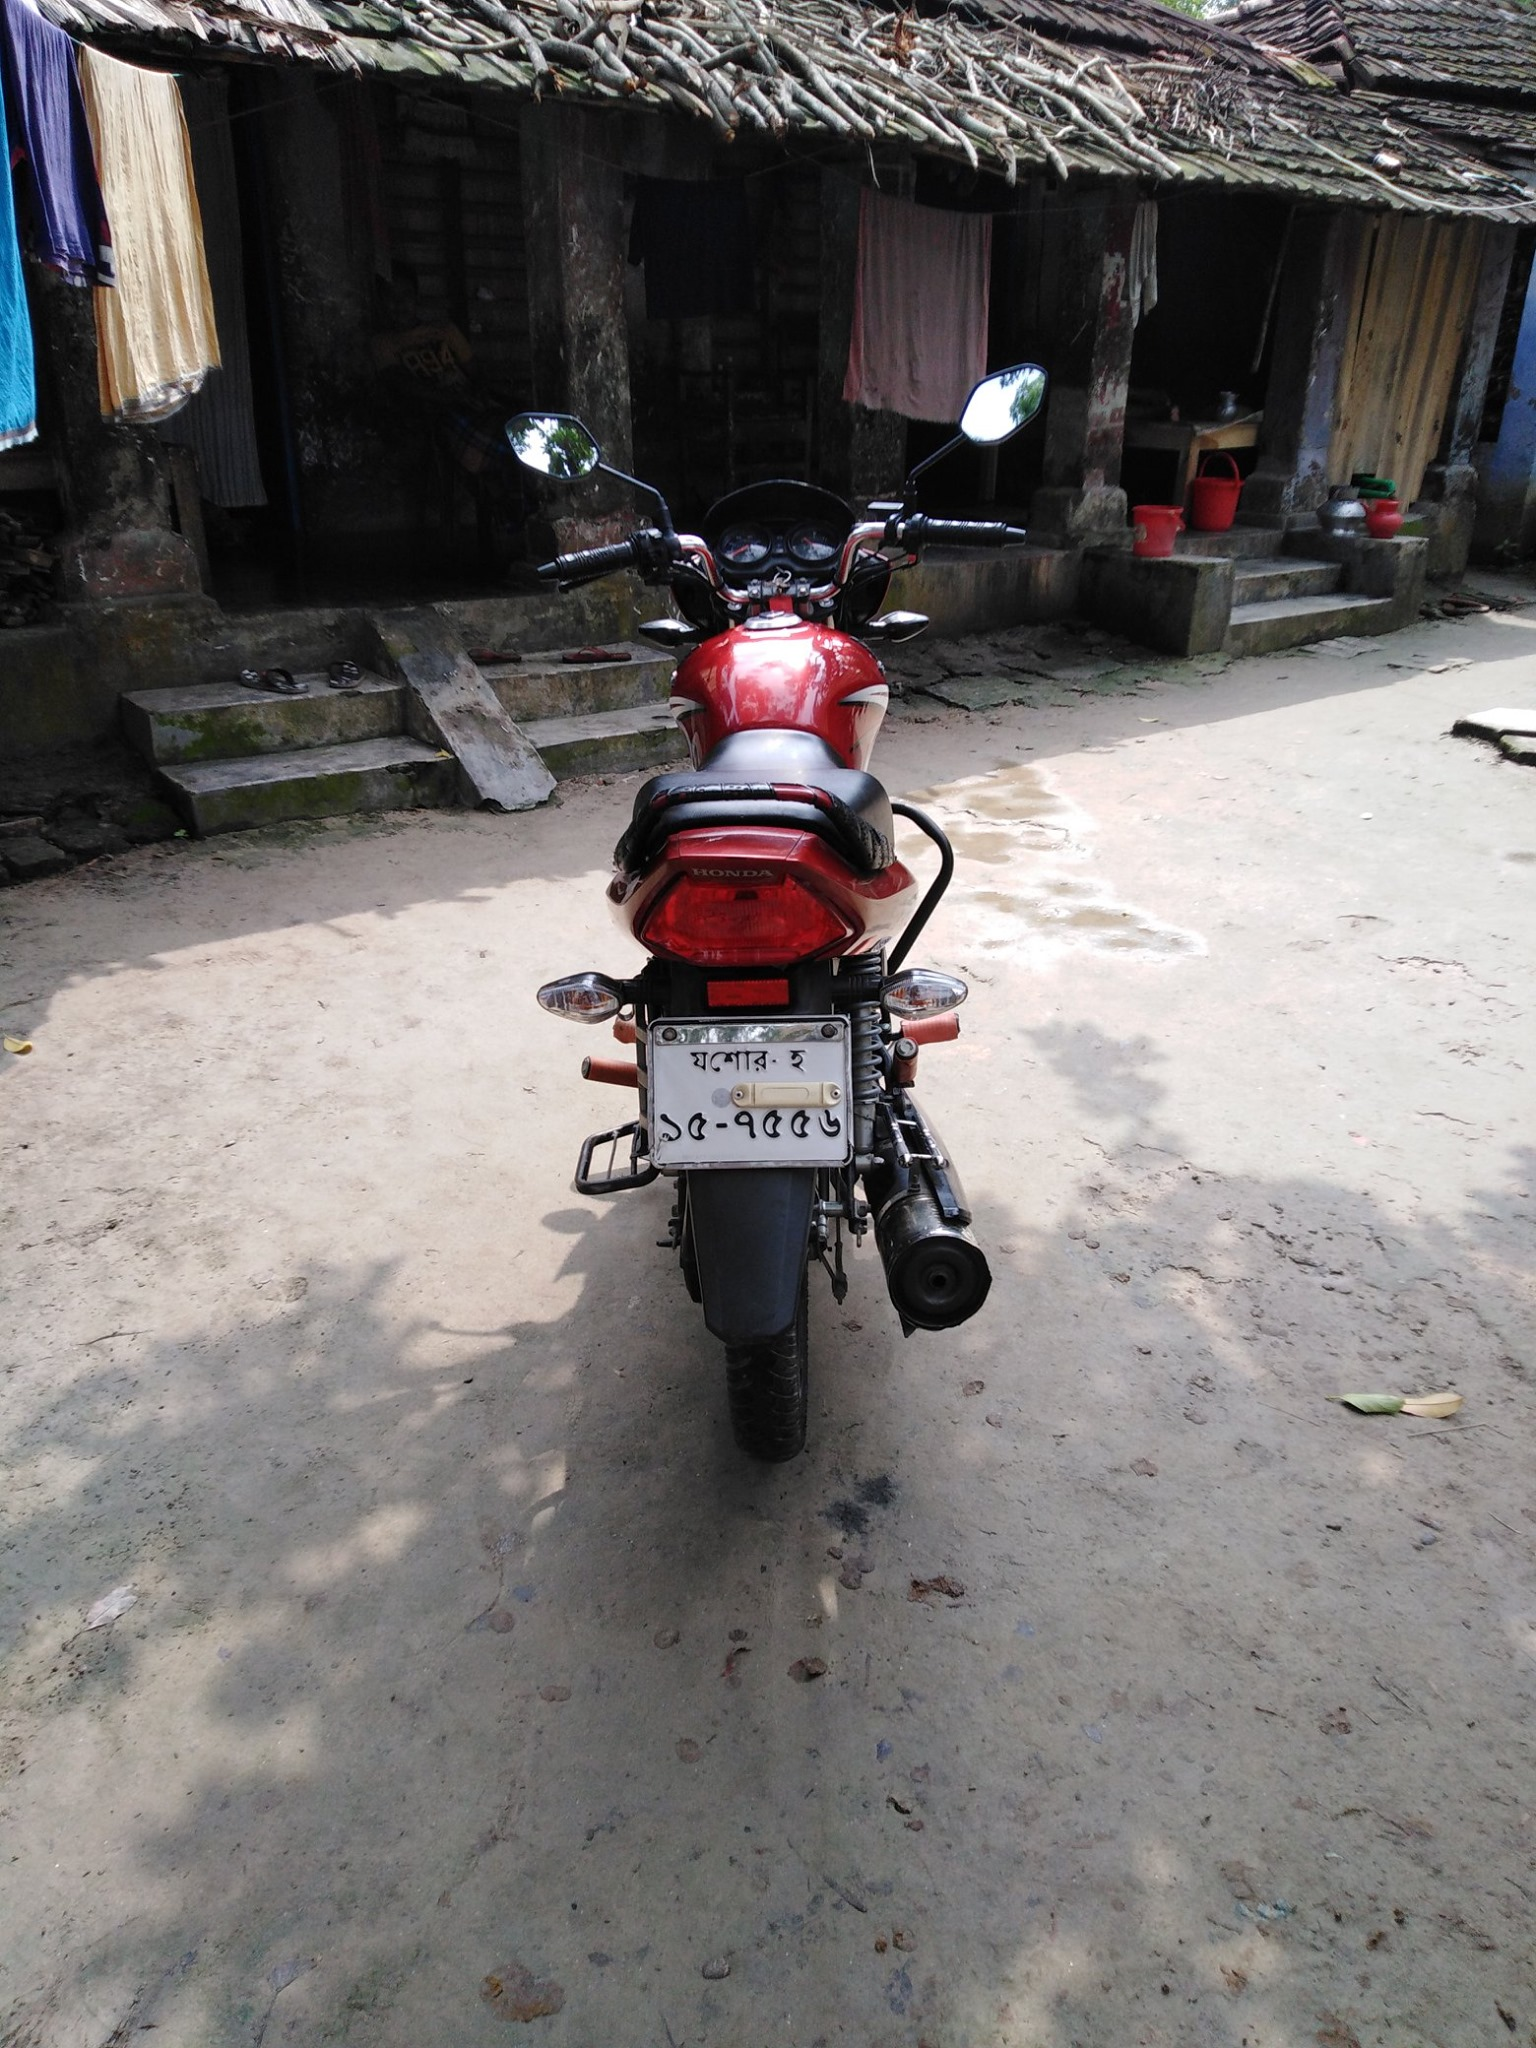

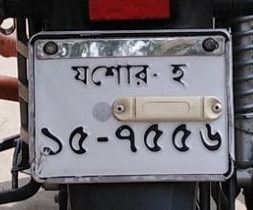

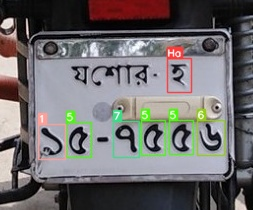

Vehicle11.txt => হ ১ ৫ ৭ ৫ ৫ ৬ 



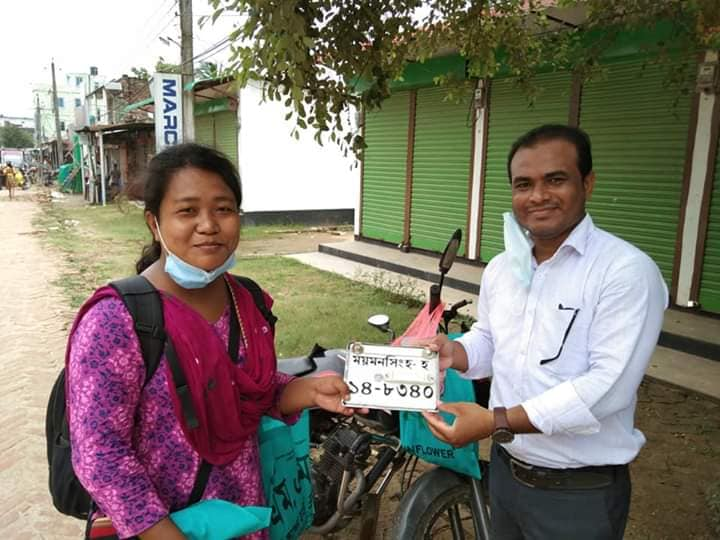

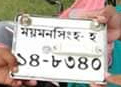

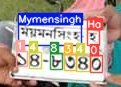

Vehicle17.txt => ময়মনসিংহ হ ১ ৪ ৮ ৩ ৪ ০ 



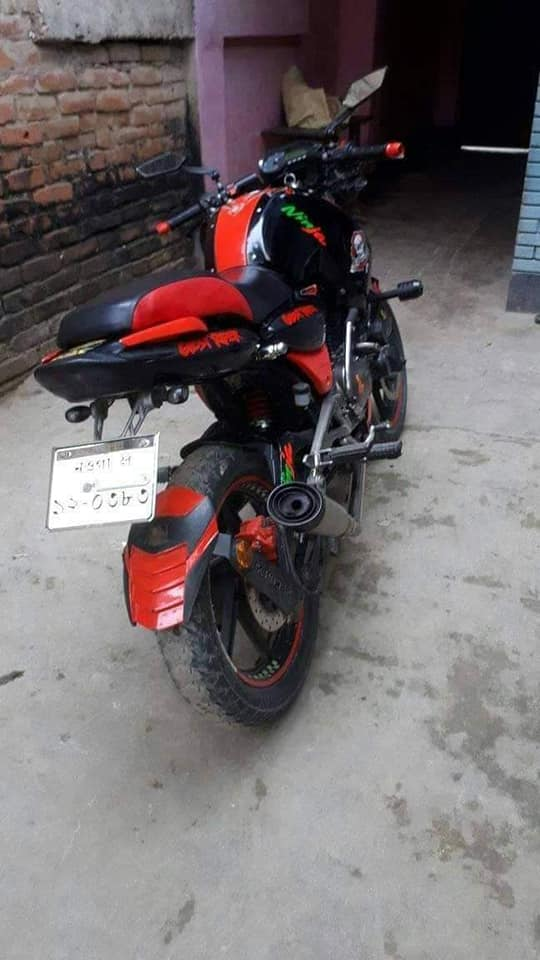

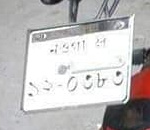

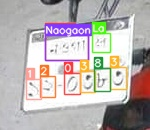

Vehicle19.txt => ভোলা নওগা ল ১ ২ ০ ৩ ৮ ৩ 



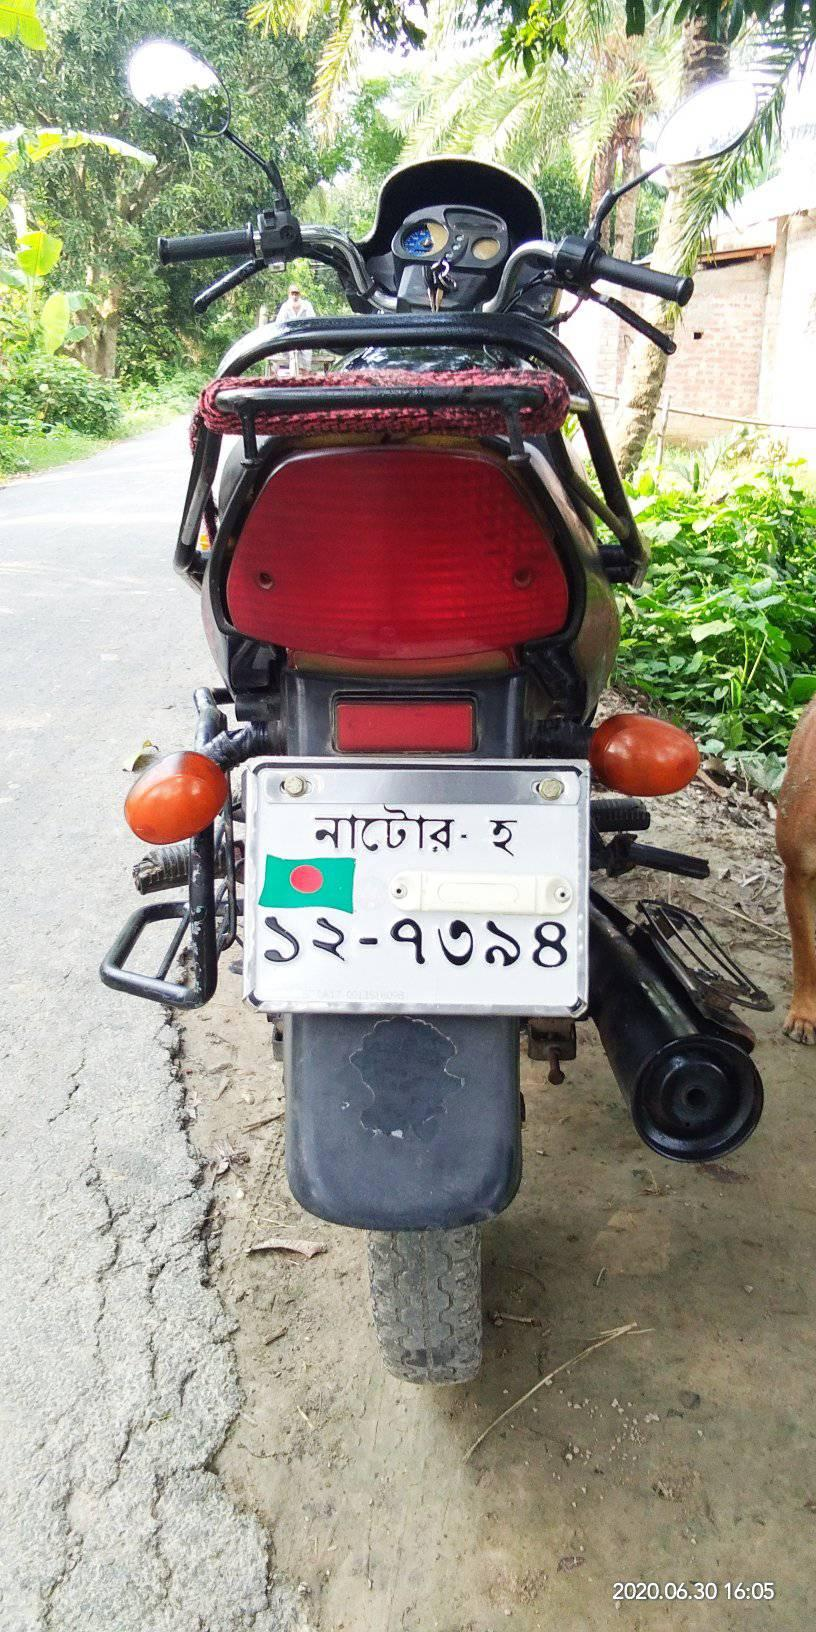

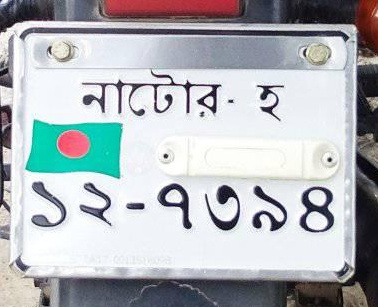

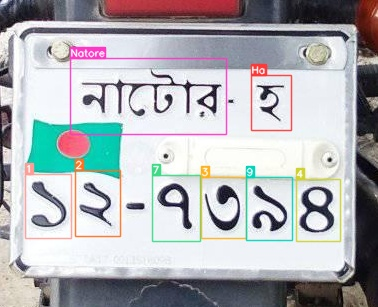

Vehicle24.txt => নাটোর হ ১ ২ ৭ ৩ ৯ ৪ 



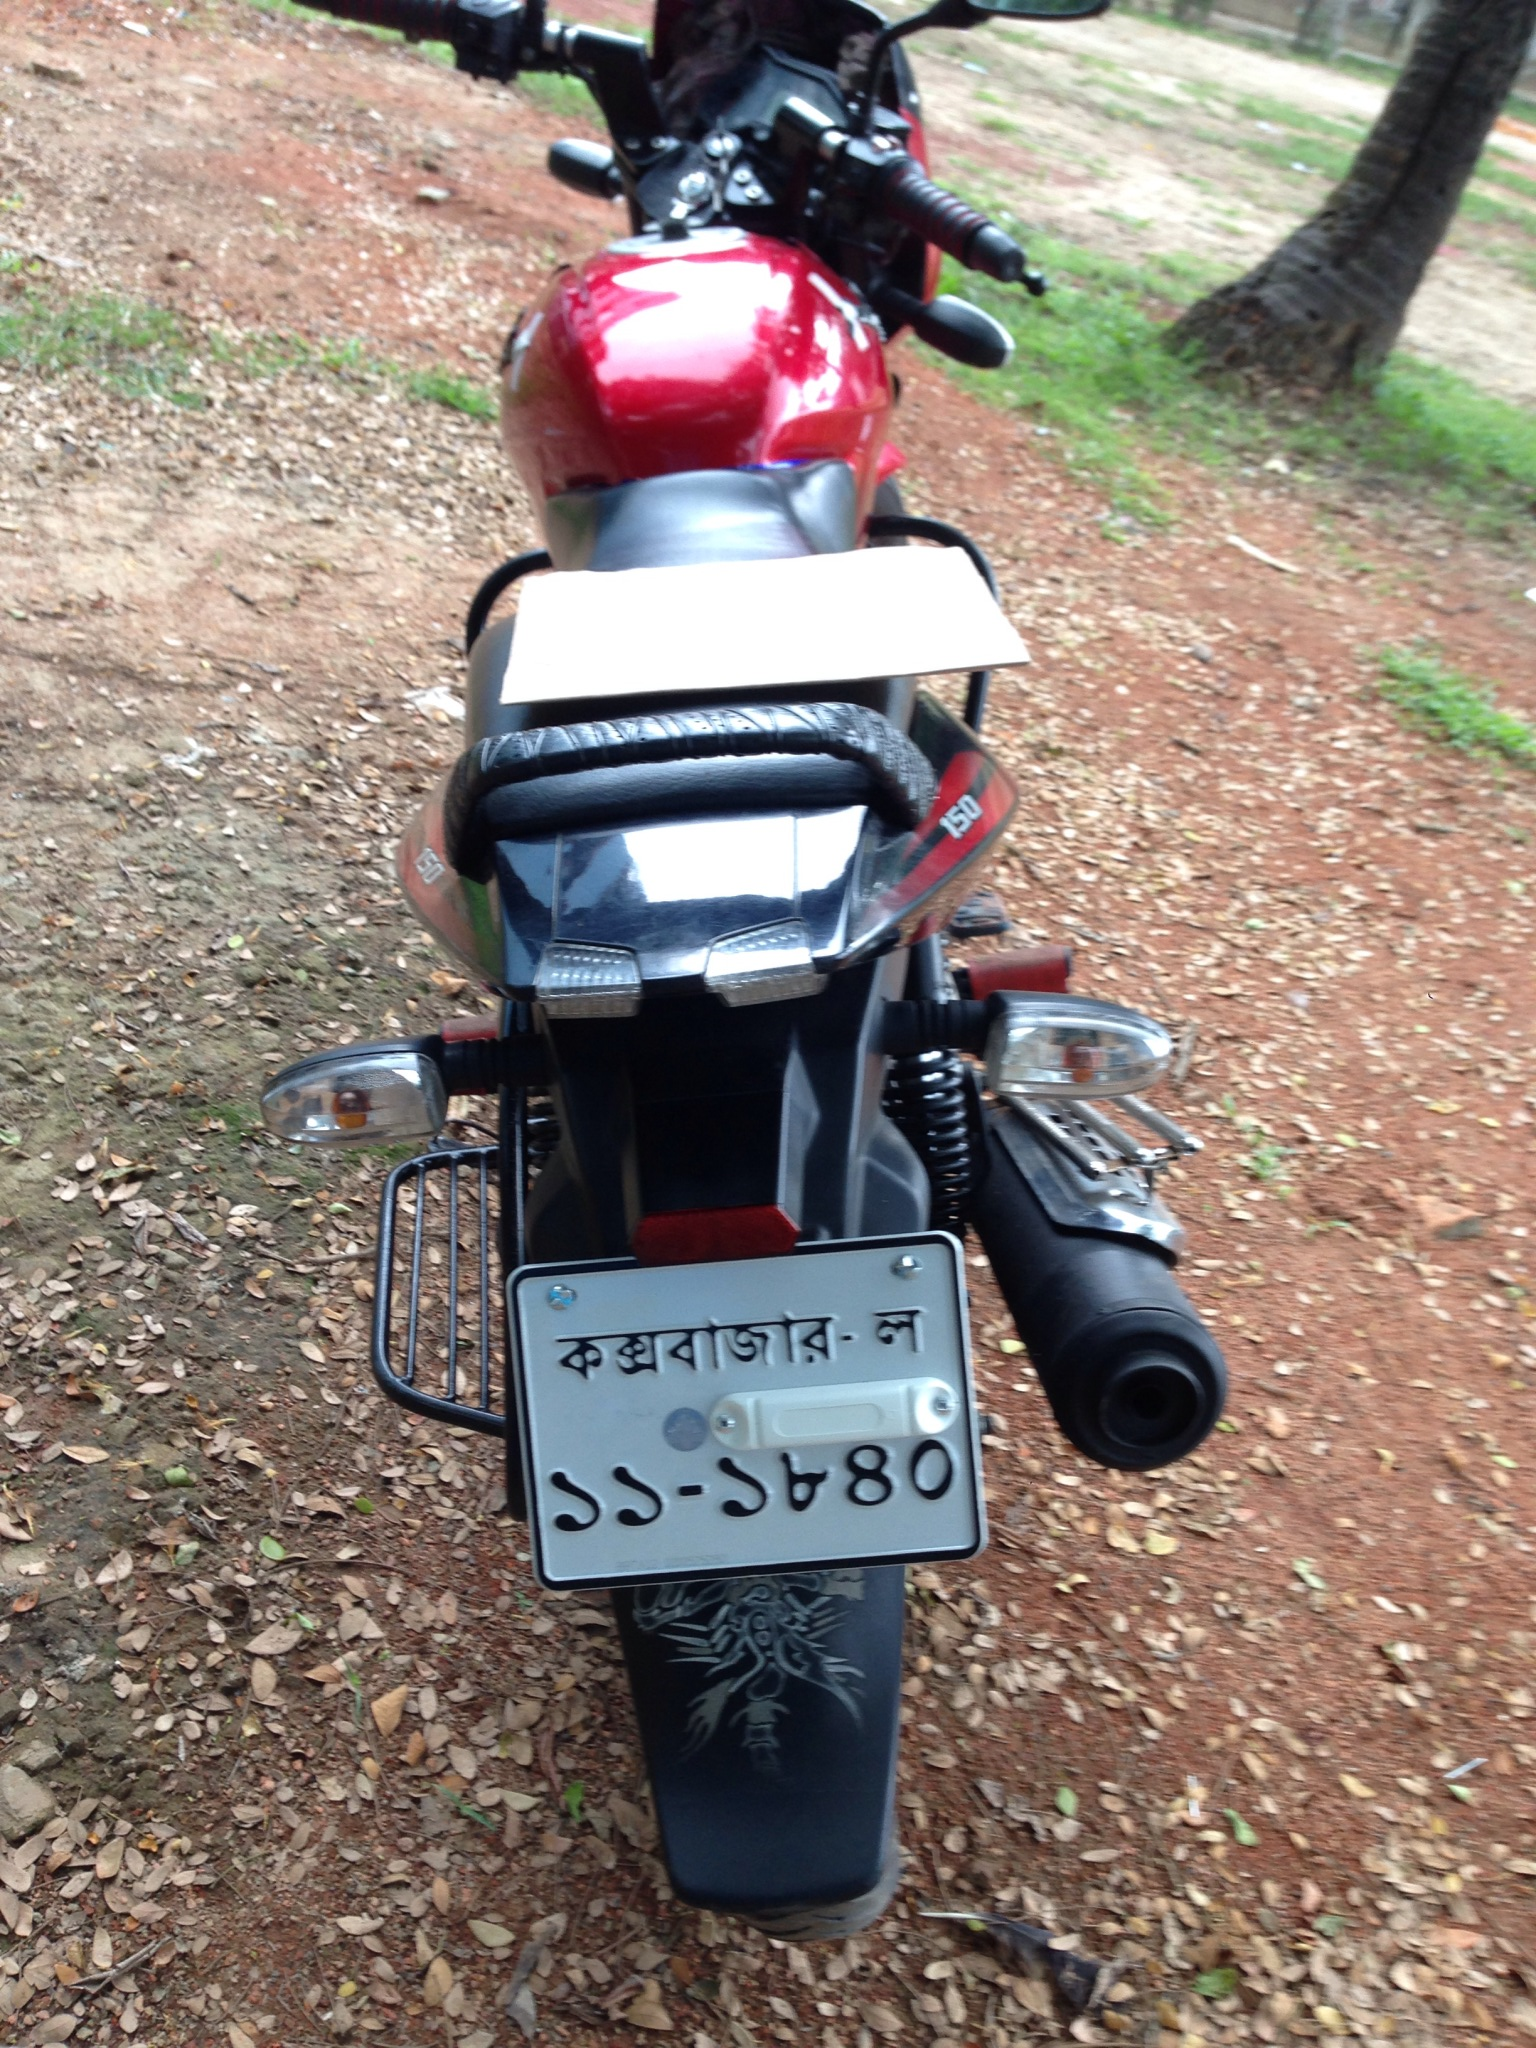

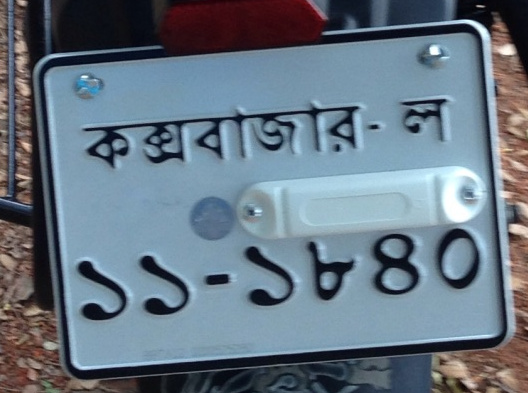

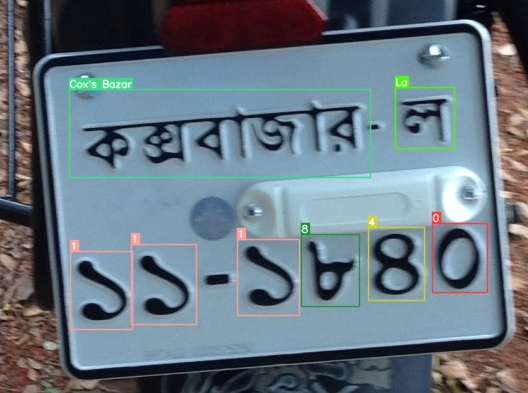

Vehicle27.txt => কক্সবাজার ল ১ ১ ১ ৮ ৪ ০ 



In [14]:
import glob
from IPython.display import Image, display
inputImages = []
croppedImages = []
textImages = []
for image in glob.glob(level1InputDir+'/*.*'):
  inputImages.append(Image(filename=image))
for image in glob.glob(level2InputDir+'/*.*'):
  croppedImages.append(Image(filename=image))
for image in glob.glob(level3InputDir+'/*.*'):
  textImages.append(Image(filename=image))
for i in range(len(inputImages)):
  display(inputImages[i])
  display(croppedImages[i])
  display(textImages[i])
  print(labels[i])
